# Symbolic math with python

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as smp

# Symbolic variables

In [76]:
smp.init_printing() # for LATEX formatted output

In [77]:
x = smp.Symbol('x')

In [78]:
print(x)

x


In [79]:
type(x)

sympy.core.symbol.Symbol

In [80]:
(smp.pi + x)**2

In [83]:
expr1 = (smp.pi + x)**2
expr1.expand()

In [84]:
expr2 = expr1.expand()
print(expr2)

x**2 + 2*pi*x + pi**2


In [85]:
expr2.factor()

# Multiple symbols can be created using symbols function and unpacking in python.

In [86]:
a,b,c = smp.symbols('a, b, c')

## mathematical type of the variable can also be defined.

In [87]:
x = smp.Symbol('x',real=True)

In [88]:
x.is_real

True

In [89]:
smp.pi.is_irrational

True

In [90]:
x.is_imaginary

False

In [91]:
x>0

In [92]:
x = smp.Symbol('x',real=True,positive=True)

In [93]:
x > 0

# Complex numbers

In [94]:
a,b,c = smp.symbols('a, b, c',real=True)

In [95]:
z = a + b*smp.I

In [96]:
z

In [97]:
z**2

In [98]:
smp.I**2

In [99]:
z1 = z**2

In [100]:
z1.expand()

In [101]:
(a**2 - b**2).factor()

In [104]:
expr1 = (a-b)*(a**2 + a*b + b**2)

In [105]:
expr1.expand()

In [106]:
expr2 = (a + b)**60

In [107]:
expr2

In [108]:
expr2.expand()

In [109]:
smp.solve(smp.tan(x)-x,x)

NotImplementedError: multiple generators [x, tan(x)]
No algorithms are implemented to solve equation -x + tan(x)

In [110]:
smp.solve(smp.cos(x)-1,x)

In [111]:
smp.solve(x**3-1,x)

In [112]:
z = smp.symbols('z',complex=True)

In [113]:
smp.solve(z**3-1,z)

In [114]:
smp.solve(z**4-1,z)

In [ ]:
smp.solve(z**5-1,z)

In [115]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x+4, x)

In [116]:
x, y, z = smp.symbols('x y z', real = True)
Fxyz = x**2 + y**2 + z**2 -4
Fxyz

In [117]:
x_sol = smp.solve(Fxyz,x)
print(x_sol)

[-sqrt(-y**2 - z**2 + 4), sqrt(-y**2 - z**2 + 4)]


In [118]:
y_sol = smp.solve(Fxyz,y)
print(y_sol)

[-sqrt(-x**2 - z**2 + 4), sqrt(-x**2 - z**2 + 4)]


In [120]:
Fxyz_fn = smp.lambdify([x,y,z],Fxyz)

In [121]:
Fxyz_fn(0,0,2)

In [122]:
sin_fn = smp.lambdify([x],smp.sin(x))

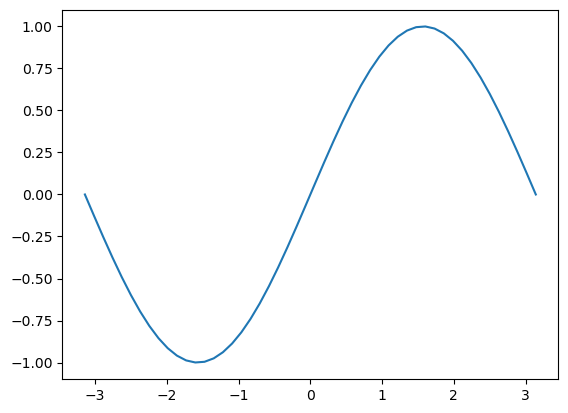

In [123]:
xval = np.linspace(-np.pi,np.pi,50)
plt.plot(xval,sin_fn(xval))
plt.show()

# Rational numbers

In [124]:
1/2

In [125]:
r1 = smp.Rational(1,2)
print(r1)

1/2


In [127]:
smp.Rational(2,3)

In [128]:
smp.expand(smp.cos(x+y),trig=True)

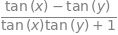

In [131]:
(smp.expand( smp.tan(x - y), trig=True )).factor()

In [134]:
fraction = 1 / (x+1)*(2*x+1)

In [135]:
smp.apart(fraction)

In [136]:
fraction1 = ( 2*x + 1 )/( x**2 + 3*x - 10 )

In [137]:
fraction1

In [138]:
smp.apart(fraction1)

# Calculus with Sympy

In [139]:
f_x1 = smp.sin(x)
f_x2 = (x-2)**2

In [140]:
smp.diff(f_x1,x)

In [141]:
smp.diff(f_x2**2,x)

In [142]:
x, y, z = smp.symbols('x y z')


In [143]:
smp.diff( x**2+y**3+z, x,1)

In [144]:
smp.diff(x**2+y**3+z,y,1)

In [145]:
smp.diff(x**2+y**3+z,z,1)

In [146]:
smp.diff(x**2+y**3+z,y,3)

In [149]:
smp.diff(y*x**2+y**3+z,x,1,y,1)

## $\frac{d}{dx}\left( \frac{1 + \cos{x}}{1 - \cos{x}} \right)$

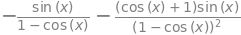

In [150]:
smp.diff( (1+smp.cos(x))/(1-smp.cos(x)),x )

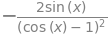

In [151]:
(smp.diff( (1+smp.cos(x))/(1-smp.cos(x)),x )).factor()

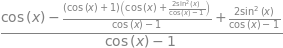

In [152]:
smp.diff( (1+smp.cos(x))/(1-smp.cos(x)),x,2 )

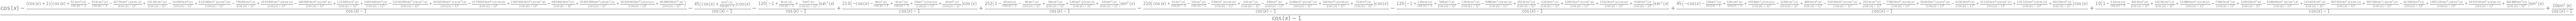

In [154]:
smp.diff( (1+smp.cos(x))/(1-smp.cos(x)),x,10 )

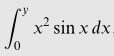

In [157]:
smp.integrate( x**2 * smp.sin(x) , (x, 0, y) )


## How to deal with general functions?

In [158]:
g = smp.symbols('g', cls=smp.Function)

In [160]:
print(g)

g(x)


In [162]:
smp.diff(g,x)

In [163]:
smp.diff(g*smp.sin(x),x)

In [164]:
smp.diff(g*smp.sin(x),x).doit()

In [169]:
u,v = smp.symbols('u,v',cls=smp.Function)
u = u(x)
v = v(x)

In [170]:
smp.diff(u*v, x)

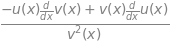

In [172]:
smp.diff(u/v, x).factor()

In [177]:
smp.integrate(u*v,(x,0,0)).doit()

## Integration

In [178]:
gauss_fn = smp.exp(-x**2)

In [179]:
print(gauss_fn)

exp(-x**2)


In [180]:
smp.integrate(gauss_fn,(x,-smp.oo, smp.oo))

In [181]:
smp.integrate(gauss_fn,(x,-0.2, 0.2))

## Double integrals

In [183]:
smp.integrate(smp.sin(x)/x, (x,-smp.oo,smp.oo))

## Series

In [184]:
n = smp.symbols('n')

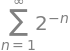

In [185]:
smp.Sum(1/2**n, (n,1,smp.oo))

In [186]:
smp.Sum(1/2**n, (n,1,smp.oo)).evalf()

In [187]:
smp.series(smp.exp(x), x)

In [194]:
smp.series(smp.sin(x), x, 0 ,2)

## Limits

In [195]:
smp.limit( smp.exp(-x)/x, x,0 )

In [196]:
smp.limit( smp.exp(-x)/x, x, smp.oo )

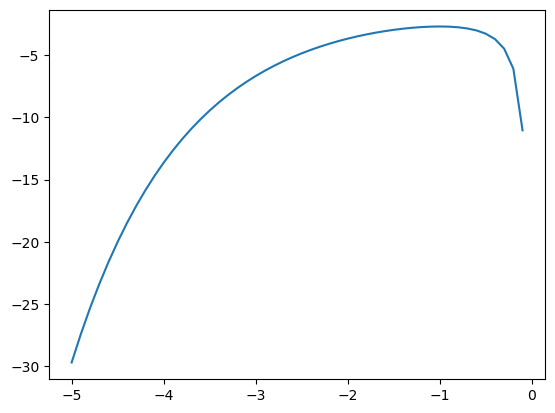

In [206]:
fnx = smp.lambdify([x],smp.exp(-x)/x)
x_vals = np.arange(-5,-0.005,0.1)
plt.plot(x_vals,fnx(x_vals))

In [204]:
smp.limit( smp.exp(-x)/x, x,0, dir='-' )

In [207]:
smp.limit( smp.exp(-x**2)/x, x, 0 )

In [208]:
smp.limit( (x**4-4**4)/(x-4), x, 4 )

In [68]:
smp.limit(1/x, x, 0, dir="+")


In [69]:
smp.limit(1/x, x, 0, dir="-")
